<a href="https://colab.research.google.com/github/chandrakanta-chaudhury/Misc/blob/master/RBFN_autoencoder_noise_Removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://groups.inf.ed.ac.uk/ami/download/temp/amiBuild-183312-Tue-Mar-31-2020.wget.sh

--2020-03-31 18:35:43--  http://groups.inf.ed.ac.uk/ami/download/temp/amiBuild-183312-Tue-Mar-31-2020.wget.sh
Resolving groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)... 129.215.202.26
Connecting to groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)|129.215.202.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2234 (2.2K) [application/x-sh]
Saving to: ‘amiBuild-183312-Tue-Mar-31-2020.wget.sh’

amiBuild-183312-Tue 100%[===================>]   2.18K  --.-KB/s    in 0s      

2020-03-31 18:35:44 (441 MB/s) - ‘amiBuild-183312-Tue-Mar-31-2020.wget.sh’ saved [2234/2234]



In [3]:
!sh amiBuild-183312-Tue-Mar-31-2020.wget.sh

--2020-03-31 18:36:10--  http://groups.inf.ed.ac.uk/ami/AMICorpusMirror//amicorpus/ES2011a/audio/ES2011a.Array1-01.wav
Resolving groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)... 129.215.202.26
Connecting to groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)|129.215.202.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35643096 (34M) [audio/x-wav]
Saving to: ‘amicorpus/ES2011a/audio/ES2011a.Array1-01.wav’

ES2011a.Array1-01.w 100%[===================>]  33.99M  6.25MB/s    in 5.4s    

2020-03-31 18:36:16 (6.25 MB/s) - ‘amicorpus/ES2011a/audio/ES2011a.Array1-01.wav’ saved [35643096/35643096]

--2020-03-31 18:36:16--  http://groups.inf.ed.ac.uk/ami/AMICorpusMirror//amicorpus/ES2011a/audio/ES2011a.Array1-02.wav
Resolving groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)... 129.215.202.26
Connecting to groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)|129.215.202.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35643096 (34M) [audio/x-wav]
Saving to: ‘amicorpus/ES20

In [4]:
!ls

amiBuild-183312-Tue-Mar-31-2020.manifest.txt  amicorpus    sample_data
amiBuild-183312-Tue-Mar-31-2020.wget.sh       CCBY4.0.txt


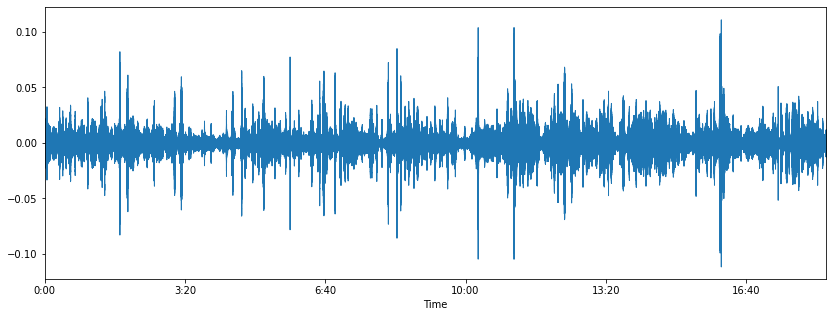

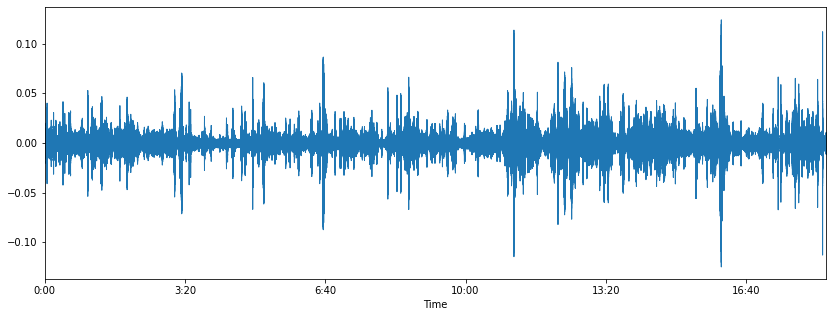

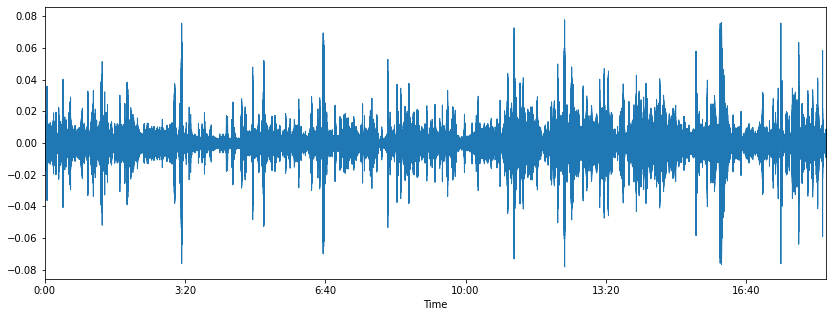

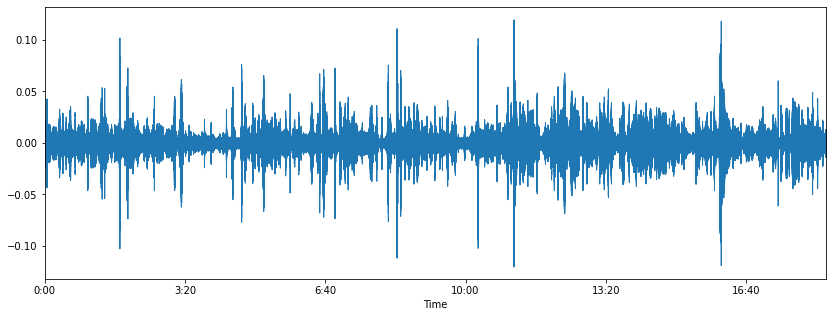

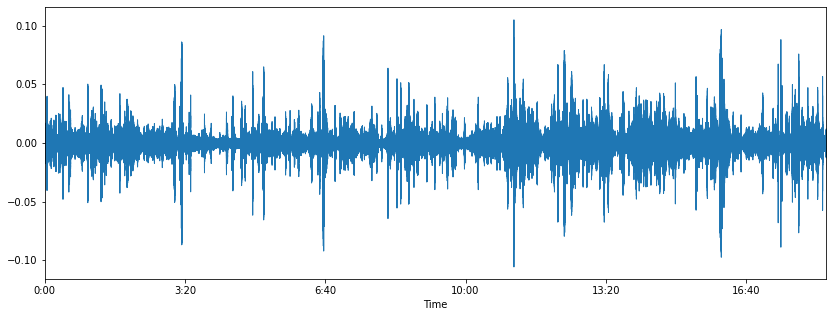

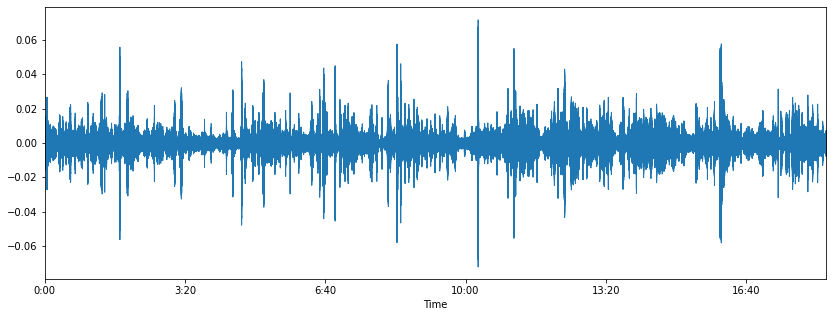

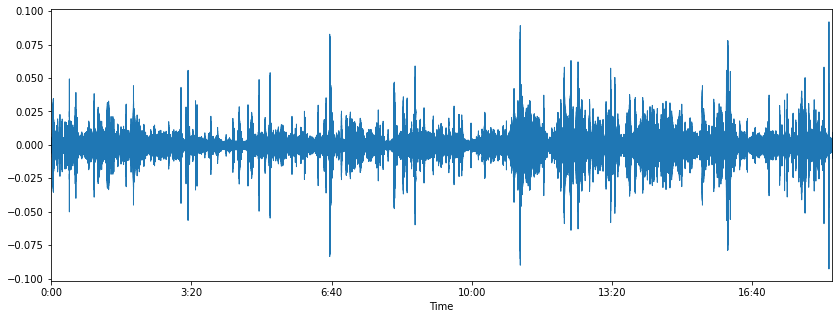

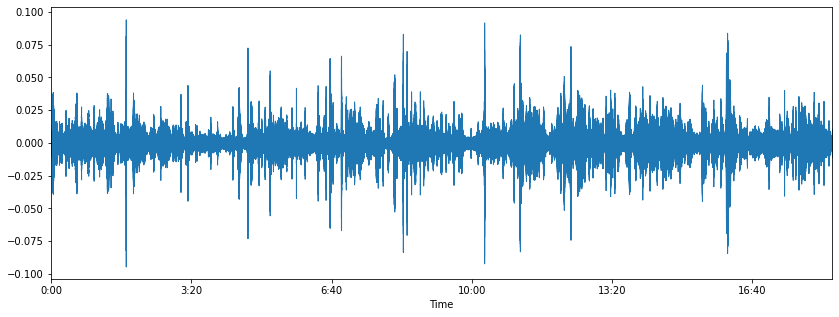

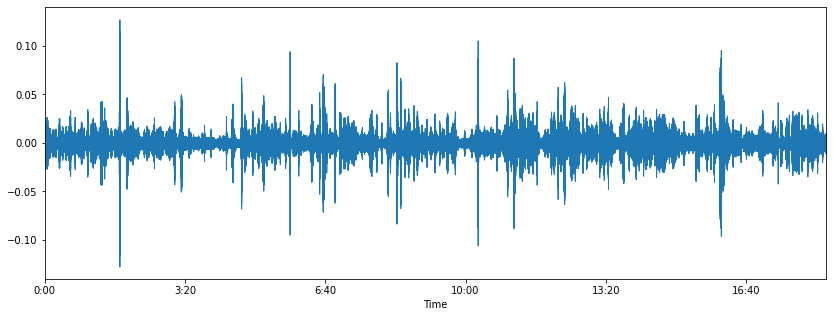

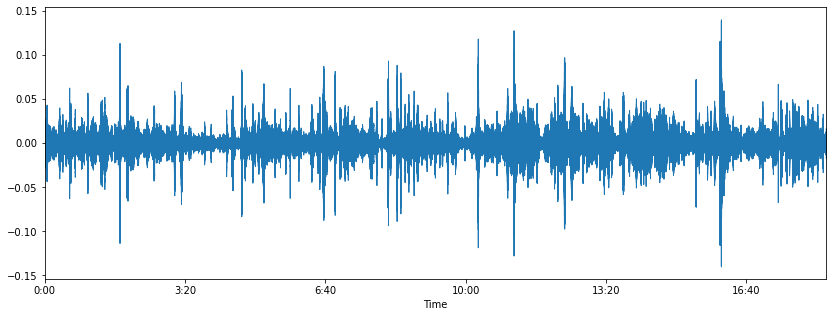

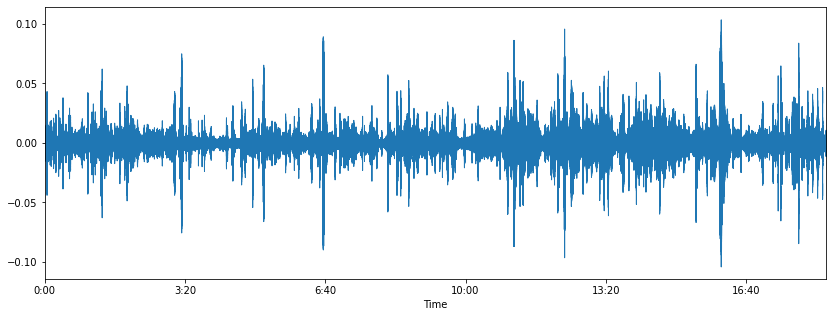

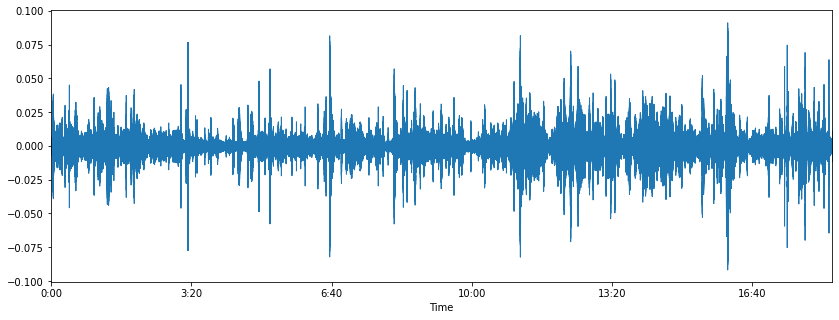

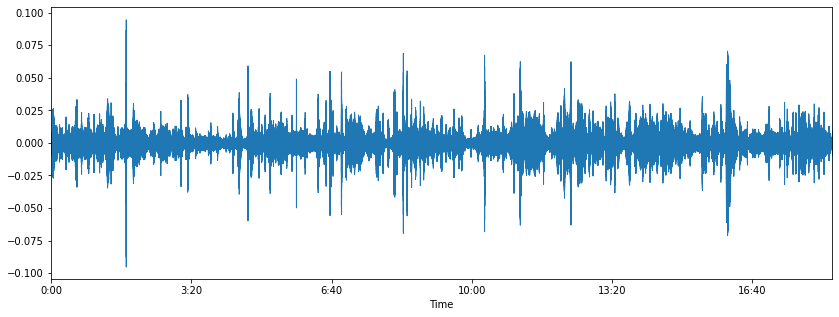

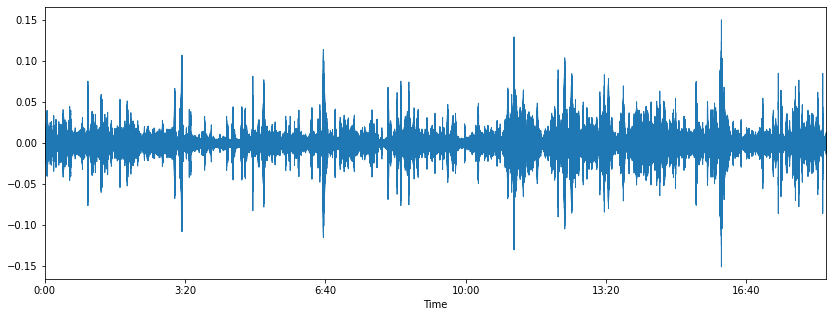

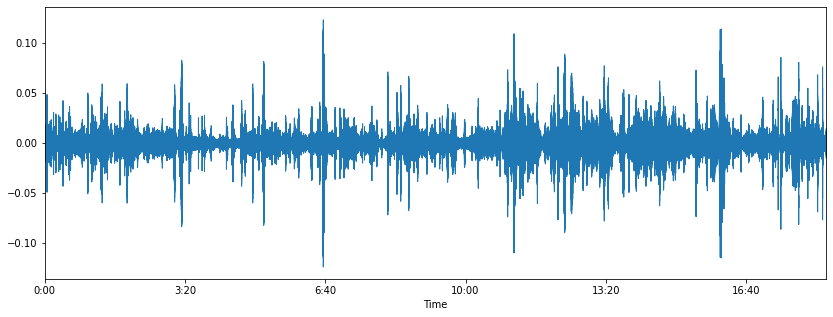

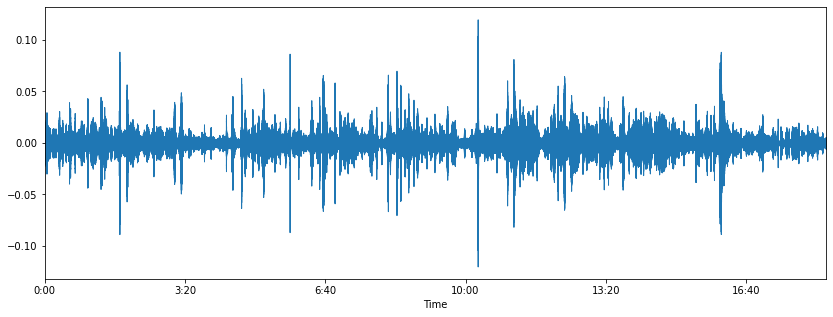

In [19]:
import librosa
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

# loop over all files in the current directory ending with .txt
for fname in glob("/content/amicorpus/ES2011a/audio/*.wav"):
  x , sr = librosa.load(fname)
  import librosa.display
  plt.figure(figsize=(14, 5))
  librosa.display.waveplot(x,sr=sr)

In [20]:
from keras import backend as K
from keras.engine.topology import Layer
from keras.initializers import RandomUniform, Initializer, Constant

Using TensorFlow backend.


In [21]:
x.shape

(24560291,)

In [0]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer
from tensorflow.keras.initializers import RandomUniform, Initializer, Constant

In [24]:
x.shape


(24560291,)

In [49]:
from glob import glob
import numpy as np
import librosa
X = []
pad = lambda a, i: a[0: i] if a.shape[0] > i else np.hstack((a, np.zeros(i - a.shape[0])))
#for fname in glob("/content/amicorpus/ES2011a/audio/*.wav"):
for fname in glob("/content/amicorpus/ES2011a/audio/*.wav"):  
    #struct = fname.split('_')
    #digit = struct[0]
    print(fname)
    wav, sr = librosa.load(fname)
    padded = pad(wav, 3000)
    X.append(padded)

/content/amicorpus/ES2011a/audio/ES2011a.Array2-07.wav
/content/amicorpus/ES2011a/audio/ES2011a.Array1-02.wav
/content/amicorpus/ES2011a/audio/ES2011a.Array1-06.wav
/content/amicorpus/ES2011a/audio/ES2011a.Array2-06.wav
/content/amicorpus/ES2011a/audio/ES2011a.Array1-04.wav
/content/amicorpus/ES2011a/audio/ES2011a.Array2-05.wav
/content/amicorpus/ES2011a/audio/ES2011a.Array1-01.wav
/content/amicorpus/ES2011a/audio/ES2011a.Array2-04.wav
/content/amicorpus/ES2011a/audio/ES2011a.Array2-02.wav
/content/amicorpus/ES2011a/audio/ES2011a.Array2-08.wav
/content/amicorpus/ES2011a/audio/ES2011a.Array1-07.wav
/content/amicorpus/ES2011a/audio/ES2011a.Array1-05.wav
/content/amicorpus/ES2011a/audio/ES2011a.Array2-03.wav
/content/amicorpus/ES2011a/audio/ES2011a.Array1-03.wav
/content/amicorpus/ES2011a/audio/ES2011a.Array1-08.wav
/content/amicorpus/ES2011a/audio/ES2011a.Array2-01.wav


In [0]:

 
X=np.vstack(X)



In [51]:
X.shape

(16, 3000)

In [35]:

rbflayer = RBFLayer(X.shape[0],
                        initializer=InitCentersRandom(X),
                        betas=1.0,
                        input_shape=(X.shape[1],))

check


In [36]:
model = Sequential()
model.add(rbflayer)

build inside
[15  4 10  1 14  2 12 12 12 14  3 14 10  0  5  6]
call check


In [0]:
#new way RBF 
class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
#         print(input_shape)
#         print(self.units)
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)


In [0]:
from tensorflow.keras.layers import Flatten
model = Sequential()
model.add(Flatten(input_shape=(1,X.shape[1])))
model.add(RBFLayer(100, 0.5))

In [69]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 3000)              0         
_________________________________________________________________
rbf_layer_9 (RBFLayer)       (None, 100)               300000    
Total params: 300,000
Trainable params: 300,000
Non-trainable params: 0
_________________________________________________________________


In [0]:
#now decode it
model.add(RBFLayer(3000, 0.5))

In [71]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 3000)              0         
_________________________________________________________________
rbf_layer_9 (RBFLayer)       (None, 100)               300000    
_________________________________________________________________
rbf_layer_10 (RBFLayer)      (None, 3000)              300000    
Total params: 600,000
Trainable params: 600,000
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [73]:
X.shape

(16, 3000)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.3)

In [75]:
X_train.shape,X_test.shape


((11, 3000), (5, 3000))

In [76]:
model.fit(X_train,X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/100
1/1 [==============================] - 0s 148ms/step - loss: 0.0179 - val_loss: 0.0105
Epoch 2/100
1/1 [==============================] - 0s 28ms/step - loss: 0.0106 - val_loss: 0.0065
Epoch 3/100
1/1 [==============================] - 0s 26ms/step - loss: 0.0066 - val_loss: 0.0045
Epoch 4/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - val_loss: 0.0036
Epoch 5/100
1/1 [==============================] - 0s 30ms/step - loss: 0.0036 - val_loss: 0.0032
Epoch 6/100
1/1 [==============================] - 0s 28ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 7/100
1/1 [==============================] - 0s 28ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 8/100
1/1 [==============================] - 0s 28ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 9/100
1/1 [==============================] - 0s 30ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 10/100
1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 11/100
1/1 [

In [77]:
y=model.predict(X_test)

In [78]:
y.shape

(5, 3000)

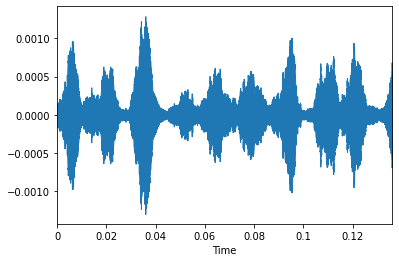

In [80]:
import librosa
 
librosa.display.waveplot(y,sr=sr)